In [20]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib notebook

## 2) Testing, testing... ##

### part a: Sod Shock Tube ###

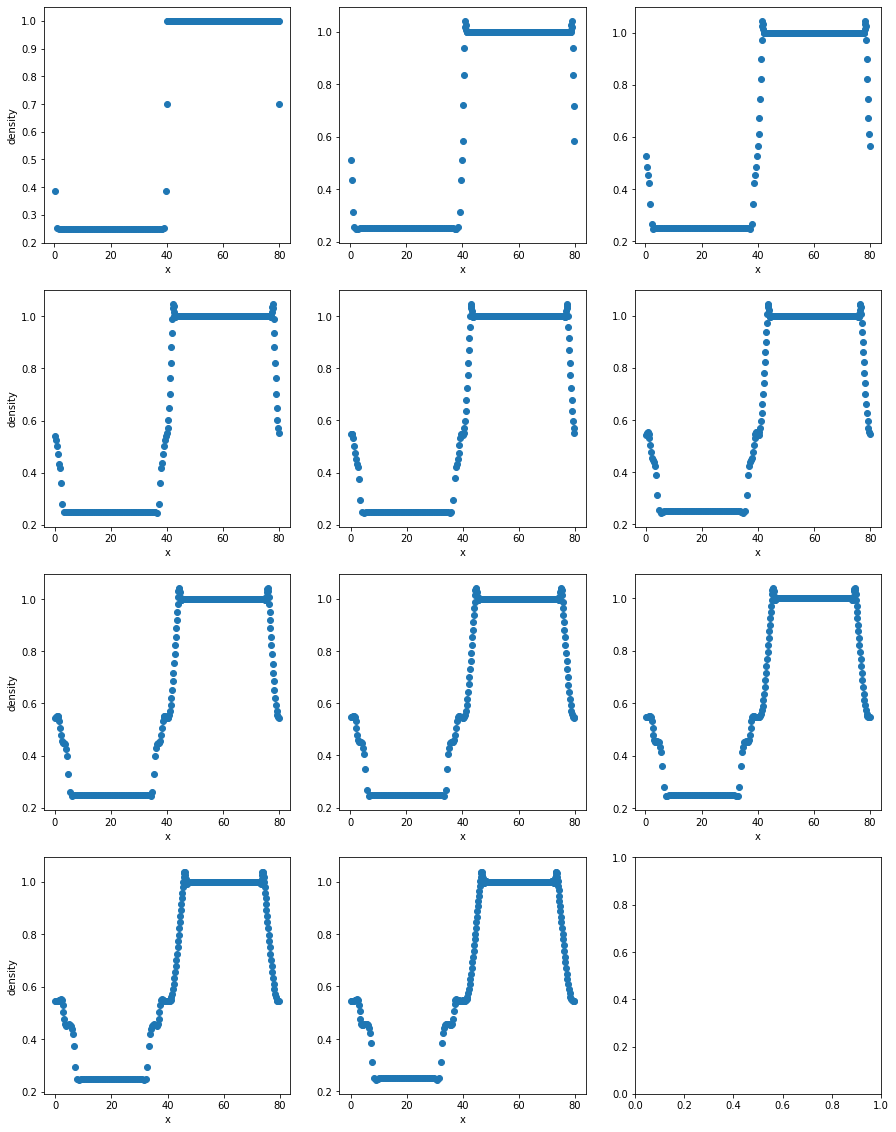

In [4]:
# collecting densities & positions for each timestep file (there are 10)

xs = []
dens = []
for i in range(11):
    if i<10:
        file = 'shocktube/snapshot_00' + str(i) + '.hdf5'
    elif i==10:
        file = 'shocktube/snapshot_0' + str(i) + '.hdf5'
    f = h5py.File(file, 'r')
    x3D = f['PartType0']['Coordinates'][:]
    x_f = []
    for pos_set in x3D:
        x_f.append(pos_set[0])
    den_f = f['PartType0']['Density'][:] 
    xs.append(x_f)
    dens.append(den_f)
    
# plotting to show density time evolution
fig, axs = plt.subplots(4,3)
fig.set_size_inches(15, 20, forward=True)
for i in range(len(xs)):
    if i<3:
        row = 0
        col = i%4
    elif 3<=i<6:
        row=1
        col=(i-3)%4
    elif 6<=i<9:
        row=2
        col=(i-6)%4
    elif 9<=i:
        row=3
        col=(i-9)%4
       
    axs[row, col].scatter(xs[i], dens[i])
    axs[row, col].set_xlabel('x')
    axs[0, 0].set_ylabel('density')
    axs[1, 0].set_ylabel('density')
    axs[2, 0].set_ylabel('density')
    axs[3, 0].set_ylabel('density')

In [6]:
f10 = h5py.File('shocktube/snapshot_010.hdf5', 'r')  # final time file

# List the names of the available data arrays
partdata = f10['PartType0']
for name in partdata:
    print(name)
    
# Grab the data
gamma = 1.4
x3D = f10['PartType0']['Coordinates'][:]
den = f10['PartType0']['Density'][:] # Returns a ndarray
v3D = f10['PartType0']['Velocities'][:]
e = f10['PartType0']['InternalEnergy'][:]

x = [] #1D postition
for pos_set in x3D:
    x.append(pos_set[0])
v = [] #1D velocity
for v_set in v3D:
    v.append(v_set[0]) 
pres = [] #pressure
for i in range(len(e)):
    pressure = den[i]*e[i]*(gamma-1)
    pres.append(pressure)    
s = [] #entropy
for i in range(len(pres)):
    entropy = pres[i]/(den[i]**gamma)
    s.append(entropy)

Coordinates
Density
InternalEnergy
Masses
ParticleChildIDsNumber
ParticleIDGenerationNumber
ParticleIDs
SmoothingLength
Velocities


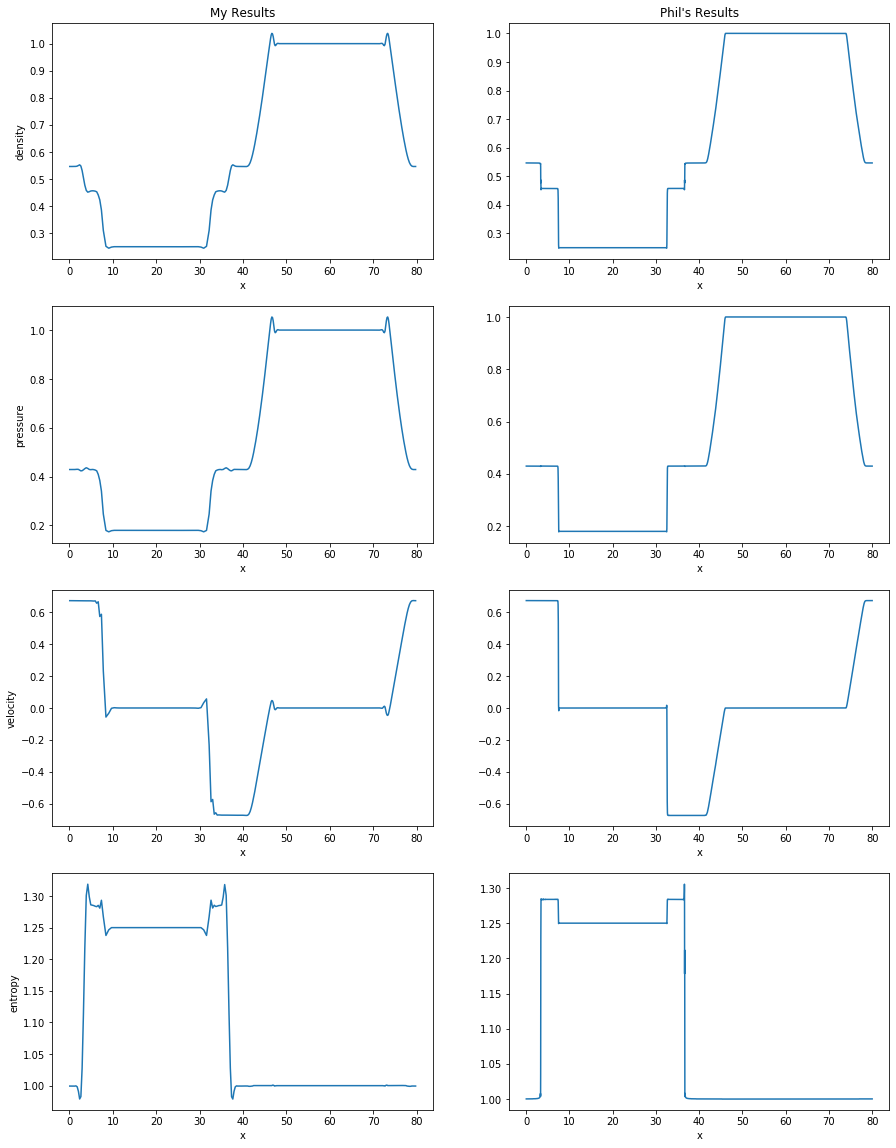

In [7]:
# collecting Phil's schocktube results to compare
phil = open('shocktube/shocktube_phil.txt.rtf', 'r')

phil_data = phil.readlines()[9:]
x_check = []
den_check = []
pres_check = []
s_check = []
v_check = []

for line in phil_data:
    split=line.split()
    row = [float(i[0:6]) for i in split]
    x_check.append(row[0])
    den_check.append(row[1])
    pres_check.append(row[2])
    s_check.append(row[3])
    v_check.append(row[4])

    
fig, axs = plt.subplots(4, 2)

axs[0, 0].plot(x, den)
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('density')
axs[0, 0].set_title('My Results')
axs[0, 1].plot(x_check, den_check)
axs[0, 1].set_xlabel('x')
axs[0, 1].set_title("Phil's Results")


axs[1, 0].plot(x, pres)
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('pressure')
axs[1, 1].plot(x_check, pres_check)
axs[1, 1].set_xlabel('x')

axs[2, 0].plot(x, v)
axs[2, 0].set_xlabel('x')
axs[2, 0].set_ylabel('velocity')
axs[2, 1].plot(x_check, v_check)
axs[2, 1].set_xlabel('x')

axs[3, 0].plot(x, s)
axs[3, 0].set_xlabel('x')
axs[3, 0].set_ylabel('entropy')
axs[3, 1].plot(x_check, s_check)
axs[3, 1].set_xlabel('x')

fig.set_size_inches(15, 20, forward=True)

My results show pretty obvious bumps of error while Phil's results look very smooth. This likely becuase he used some higher-quality methods than I did and also smaller step sizes. It does however, look like he has a discontinous point in the entropy plot which I am interested in. Overall,  I am quite happy with the similarities in our results and feel confident I have compiled things correctly; some parameters could be tweaked slightly to improve the results.

### part b: But what about magnetic fields? ###

In [9]:
f11 = h5py.File('magWave/snapshot_011.hdf5', 'r')  # final time snapshot for linear magnetosonic wave

# List the names of the available data arrays
partdata = f11['PartType0']
for name in partdata:
    print(name)

Coordinates
Density
InternalEnergy
MagneticField
Masses
ParticleChildIDsNumber
ParticleIDGenerationNumber
ParticleIDs
SmoothingLength
Velocities


Text(0.5, 1.0, 'Magnetic Field: z Component')

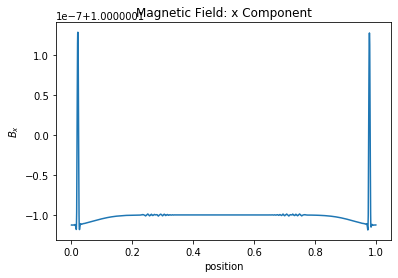

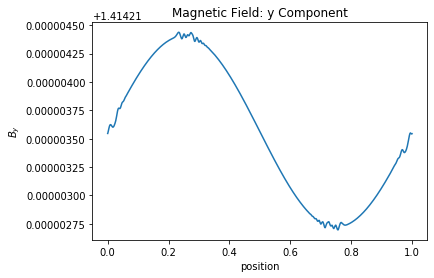

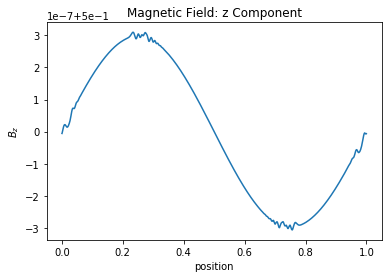

In [32]:
# posiition and magnetic field
pos3D = f11['PartType0']['Coordinates'][:]
B3D = f11['PartType0']['MagneticField'][:]

pos = [] #1D postition
for pos_set in pos3D:
    pos.append(pos_set[0])
    
Bx = []
By = []
Bz = []
for Bset in B3D:
    Bx.append(Bset[0])
    By.append(Bset[1])
    Bz.append(Bset[2]) 
    
plt.figure()
plt.plot(pos, Bx)
plt.xlabel('position')
plt.ylabel('$B_x$')
plt.title('Magnetic Field: x Component')

plt.figure()
plt.plot(pos, By)
plt.xlabel('position')
plt.ylabel('$B_y$')
plt.title('Magnetic Field: y Component')

plt.figure()
plt.plot(pos, Bz)
plt.xlabel('position')
plt.ylabel('$B_z$')
plt.title('Magnetic Field: z Component')


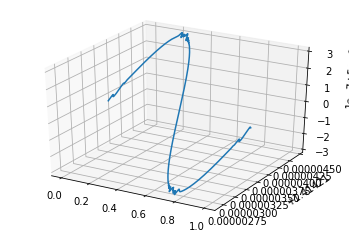

In [35]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(pos, By, Bz)

### part e: Problems and comments ###

The biggest hold up I had from this question was figuring out how to obtain output snapshots. When I originally ran the GIZMO code I had it write to an output file, which I assumed would be the snapshot. However, this was all the text GIZMO outputs as it runs and so I couldn't use that. While the documentation talks a lot about the snapshots I assumed you would have to direct it to writeout in the command line. In the end the snapshots were "right under my nose" in the output subdirectory. 

After successfully running the shocktube GIZMO test, I felt pretty confident and eager so I tried running one of the more complicated MHD test problems, the Orszag-Tang vortex. My first error had to do with not meeting some MPI criteria (I started only running on one core). Then I parallelized the command using 16 cores but TACC said something about there not being enough topnodes (?) available along with some memory issues so I decreased the number of cores to 5. This made more progress but then a timestep error came up: the calculated timestep was less than the allowed value. So, striking out, I moved on to the simple linear magnetosonic wave and things seemed to run smoothly after that. 

## 3. Sod it! Not again! ##

In [68]:
# redid my work for HW 2 using the solution you gave!

# constants given
CFL = 0.5
x_min = 0
x_max = 2
q0 = 4
q1 = 0.5
gamma = 1.4
N = 200

def timestep(xs, cs, vs):
    dx = np.array([xs[i+1] - xs[i] for i in range(0, len(xs)-1)])
    dt = CFL*np.min(dx/(cs+np.abs(vs[:-1])))
    return dt

dx = (x_max - x_min)/N
v_init = 0

# position array - integer index
xs = np.linspace(x_min, x_max, N+1)
vs = np.zeros(N+1)

# other values
center = np.linspace(x_min+dx/2, x_max-dx/2, N)
rhos = np.array([1 if i <= 0.75 else 0.125 for i in center])
Ps = np.array([1 if i<=0.75 else 0.1 for i in center])
es = Ps*(gamma-1)**-1*rhos**-1
cs = (gamma*Ps/rhos)**0.5
qs = np.array([0 for i in rhos])

# mass incremements
dm_half = (x_max-x_min)*rhos/N
dm = np.array([dm_half[i+1] if i==-1 else dm_half[len(dm_half)-1] if i==len(dm_half)-1 else (dm_half[i]+dm_half[i+1])/2 for i in range(-1, len(dm_half), 1)])

t = 0
dt_old = timestep(xs, cs, vs)
while t < 0.245:
    dps = np.array([0 if (i==-1 or i==len(Ps)-1) else Ps[i+1]-Ps[i] for i in range(-1, len(Ps), 1)])
    dqs = np.array([0 if (i==-1 or i==len(qs)-1) else qs[i+1]-qs[i] for i in range(-1, len(qs), 1)])

    # time-step
    dt_new = timestep(xs, cs, vs)
    dt_half = (dt_new+dt_old)/2

    # updating velocity, position and density
    vs_new = vs - dt_new*(dps+dqs)/dm
    xs_new = xs+dt_half*vs_new
    dxs_new = np.array([xs_new[i+1]-xs_new[i] for i in range(0, len(xs_new)-1, 1)])
    rhos_new = dm_half/dxs_new
    
    # updating more complicated things
    cs_new = (gamma*Ps/rhos_new)**0.5
    rho_avg = 0.5*((rhos_new)**-1 + (rhos)**-1)
    dvs_new = np.array([vs_new[i+1]-vs_new[i] for i in range(0, len(vs_new)-1, 1)])

    param = (dvs_new/dxs_new)
    qs_new = [(q0*(dvs_new[i])**2 - q1*(dvs_new[i]))*cs_new[i]*rho_avg[i]**-1 if param[i]<0 else 0 for i in range(len(dvs_new))]

    es_new = es - (Ps + qs)*((rhos_new)**-1-(rhos)**-1)
    Ps_new = es_new*rhos_new*(gamma-1)

    # updating
    xs = xs_new
    vs = vs_new
    rhos = rhos_new
    Ps = Ps_new
    es = es_new
    cs = cs_new
    qs = qs_new
    dt_old = dt_new
    t = t+ dt_new
    
xs_plot = np.array([ 0.5*(xs[i+1] + xs[i]) for i in range(0, len(xs) - 1, 1)])


In [115]:
# my initial condition Sod shock tube on GIZMO results

f13 = h5py.File('snapshot_013.hdf5', 'r')  # final time file

# List the names of the available data arrays
partdata = f13['PartType0']
for name in partdata:
    print(name)
    
# Grab the data
gamma = 1.4
x3D = f13['PartType0']['Coordinates'][:]
den_GIZMO = f13['PartType0']['Density'][:] # Returns a ndarray
v3D = f13['PartType0']['Velocities'][:]
e_GIZMO = f13['PartType0']['InternalEnergy'][:]

x_GIZMO = [] #1D postition
for pos_set in x3D:
    x_GIZMO.append(pos_set[0])
v_GIZMO = [] #1D velocity
for v_set in v3D:
    v_GIZMO.append(v_set[0]) 
pres_GIZMO = [] #pressure
for i in range(len(e)):
    pressure = den_GIZMO[i]*e_GIZMO[i]*(gamma-1)
    pres_GIZMO.append(pressure)    


Coordinates
Density
InternalEnergy
Masses
ParticleChildIDsNumber
ParticleIDGenerationNumber
ParticleIDs
SmoothingLength
Velocities


While I was able to run the initial conditions file I created, the results did not agree with what we found in HW 2. I tried several changes in the code, using the rho_desired and p_desired value and then the initial arrays of density and pressurre that we used in our setup for HW 2 but none of these seemed to work. These were the best results I was able to obtain.

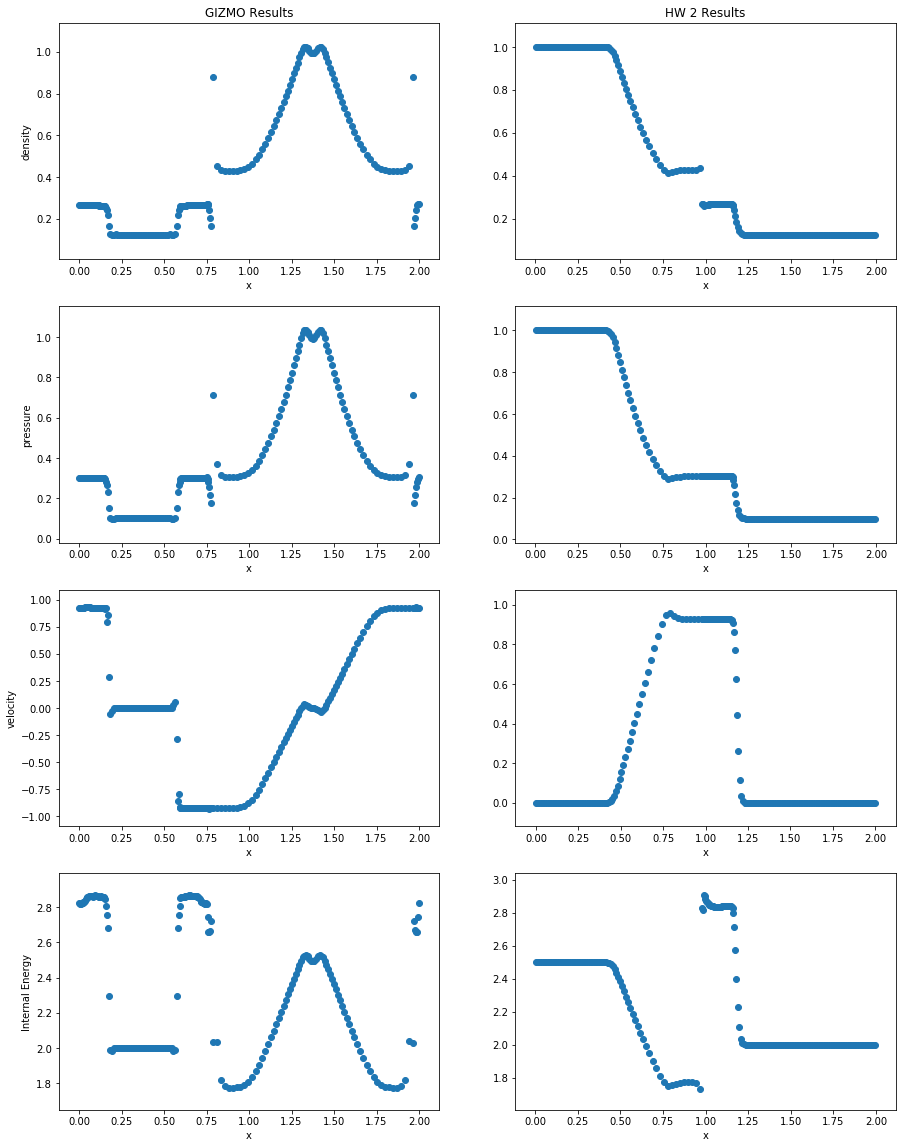

In [116]:
# plotting shock tube results from HW 2 and from GIZMO

fig, axs = plt.subplots(4, 2)

axs[0, 0].scatter(x_GIZMO, den_GIZMO)
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('density')
axs[0, 0].set_title('GIZMO Results')
axs[0, 1].scatter(xs_plot, rhos)
axs[0, 1].set_xlabel('x')
axs[0, 1].set_title("HW 2 Results")


axs[1, 0].scatter(x_GIZMO, pres_GIZMO)
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('pressure')
axs[1, 1].scatter(xs_plot, Ps)
axs[1, 1].set_xlabel('x')

axs[2, 0].scatter(x_GIZMO, v_GIZMO)
axs[2, 0].set_xlabel('x')
axs[2, 0].set_ylabel('velocity')
axs[2, 1].scatter(xs, vs)
axs[2, 1].set_xlabel('x')

axs[3, 0].scatter(x_GIZMO, e_GIZMO)
axs[3, 0].set_xlabel('x')
axs[3, 0].set_ylabel('Internal Energy')
axs[3, 1].scatter(xs_plot, es)
axs[3, 1].set_xlabel('x')

fig.set_size_inches(15, 20, forward=True)

I even compared against the initial results of what Phil provided in his shocktube ics emass file. I didn't see any major differences, but I do have a jump in my particle mass but I believe that is due to the pressure/density difference between the boundary which should be expected.

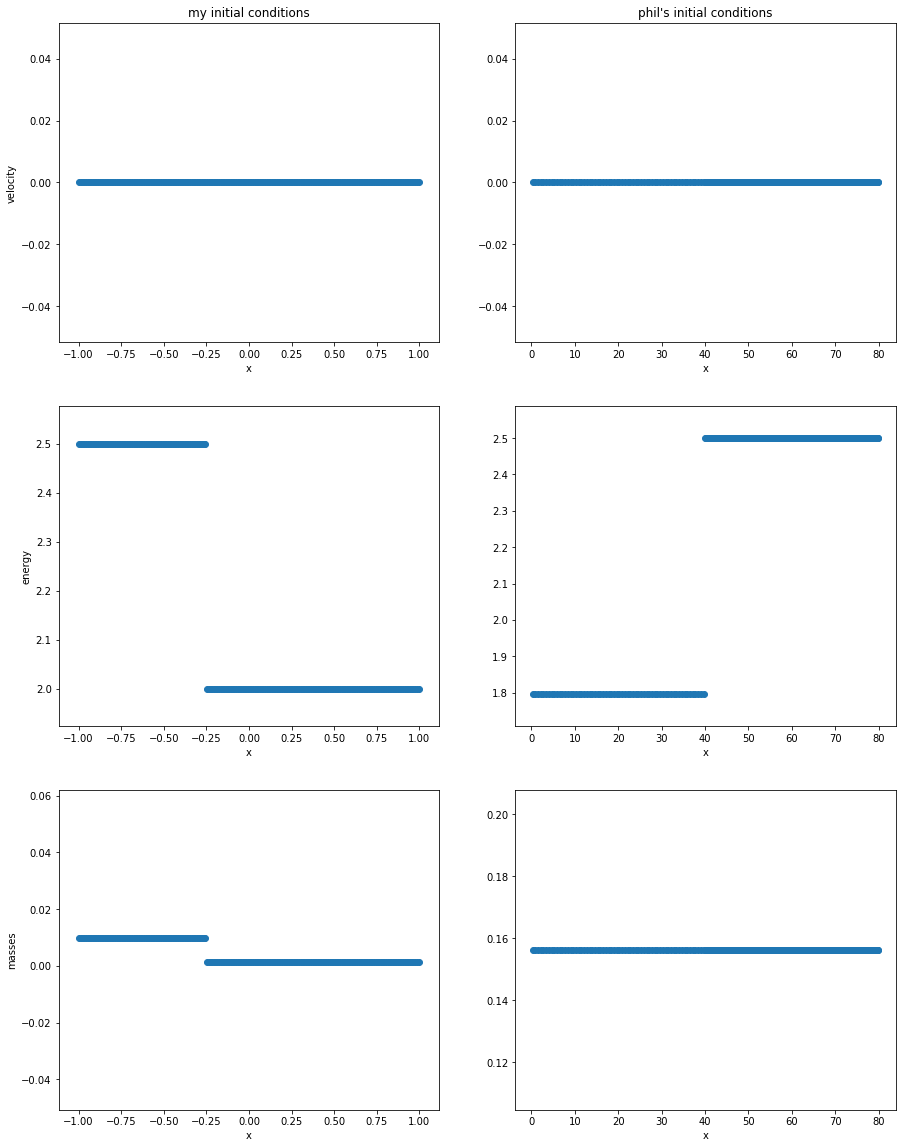

In [114]:
f_ST = h5py.File('sodShockHW2.hdf5', 'r')  # final time fil
    
# Grab the data
gamma = 1.4
x3D = f_ST['PartType0']['Coordinates'][:]
#den_mine = f_ST['PartType0']['Density'][:] # Returns a ndarray
v3D = f_ST['PartType0']['Velocities'][:]
e_mine = f_ST['PartType0']['InternalEnergy'][:]
m_mine = f_ST['PartType0']['Masses'][:]
x_mine = [] #1D postition
for pos_set in x3D:
    x_mine.append(pos_set[0])
v_mine = [] #1D velocity
for v_set in v3D:
    v_mine.append(v_set[0]) 

    
f_phil = h5py.File('shocktube_ics_emass.hdf5', 'r')

# Grab the data
gamma = 1.4
x3D = f_phil['PartType0']['Coordinates'][:]
#den_phil = f_phil['PartType0']['Density'][:] # Returns a ndarray
v3D = f_phil['PartType0']['Velocities'][:]
e_phil = f_phil['PartType0']['InternalEnergy'][:]
m_phil = f_phil['PartType0']['Masses'][:]
x_phil = [] #1D postition
for pos_set in x3D:
    x_phil.append(pos_set[0])
v_phil = [] #1D velocity
for v_set in v3D:
    v_phil.append(v_set[0]) 

fig, axs = plt.subplots(3, 2)

axs[0, 0].scatter(x_mine, v_mine)
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('velocity')
axs[0, 0].set_title('my initial conditions')
axs[0, 1].scatter(x_phil, v_phil)
axs[0, 1].set_xlabel('x')
axs[0, 1].set_title("phil's initial conditions")


axs[1, 0].scatter(x_mine, e_mine)
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('energy')
axs[1, 1].scatter(x_phil, e_phil)
axs[1, 1].set_xlabel('x')

axs[2, 0].scatter(x_mine, m_mine)
axs[2, 0].set_xlabel('x')
axs[2, 0].set_ylabel('masses')
axs[2, 1].scatter(x_phil, m_phil)
axs[2, 1].set_xlabel('x')

fig.set_size_inches(15, 20, forward=True)

### Another important note! ###

This is my last problem set as an undergraduate! While I wish it could have been completed more fully (dang sod shock tube) I'm glad to end on this. From introductory mechanics problems sets on quest to graduate astrophysics problem sets on TACC -- I feel quite accomplished in my progress (even if there is still room to grow!) Thank you for your help on these problem sets and challenging me in new ways :)